In [18]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
iris = load_iris()

In [19]:
print("Feature names: ", iris.feature_names)
print("Target names: ", iris.target_names)
print("Data shape: ", iris.data.shape)
print("Target shape: ", iris.target.shape)

print("5 mẫu dữ liệu đầu tiên:")
print(iris.data[:5])
print(iris.target[:5])

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.describe(include='all'))

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
Data shape:  (150, 4)
Target shape:  (150,)
5 mẫu dữ liệu đầu tiên:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean        

In [24]:
X = iris.data  # Dữ liệu
y = iris.target  # Nhãn

# Chuẩn hóa dữ liệu X
X = X/X.max(axis=0)

In [25]:
print(X)

[[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]
 [0.6835443  0.88636364 0.24637681 0.16      ]
 [0.58227848 0.77272727 0.20289855 0.12      ]
 [0.63291139 0.77272727 0.2173913  0.08      ]
 [0.55696203 0.65909091 0.20289855 0.08      ]
 [0.62025316 0.70454545 0.2173913  0.04      ]
 [0.6835443  0.84090909 0.2173913  0.08      ]
 [0.60759494 0.77272727 0.23188406 0.08      ]
 [0.60759494 0.68181818 0.20289855 0.04      ]
 [0.5443038  0.68181818 0.15942029 0.04      ]
 [0.73417722 0.90909091 0.17391304 0.08      ]
 [0.72151899 1.         0.2173913  0.16      ]
 [0.6835443  0.88636364 0.1884058  0.16      ]
 [0.64556962 0.79545455 0.20289855 0.12      ]
 [0.72151899 0.86363636 0.24637681 0.12      ]
 [0.64556962 0.86363636 0.2173913  0.12      ]
 [0.6835443  0.77272727 0.24637681 0.08      ]
 [0.64556962 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



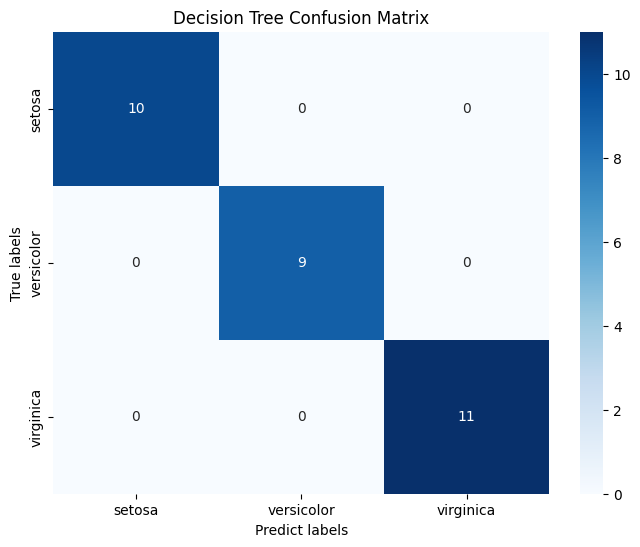

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
report = classification_report(y_test, y_pred)
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predict labels')
plt.ylabel('True labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()

**Naïve	Bayes**

Độ chính xác mô hình Naive Bayes: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



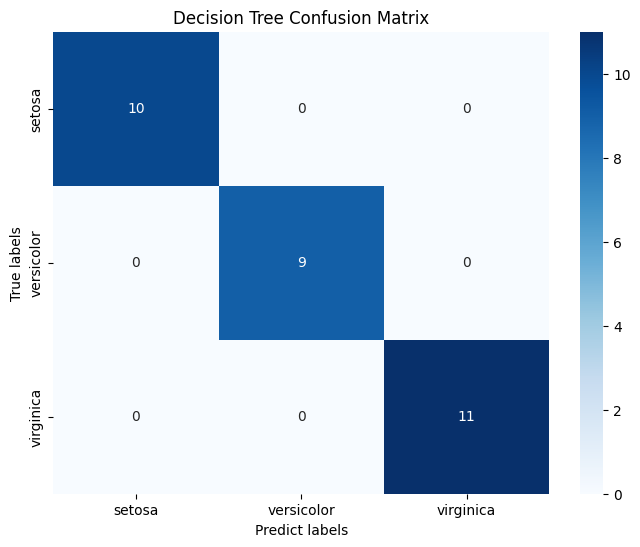

In [35]:
from sklearn.naive_bayes import GaussianNB
# Khởi tạo mô hình Gaussian Naive Bayes
gnb_model = GaussianNB()

# Huấn luyện mô hình trên tập train
gnb_model.fit(X_train, y_train)
# Dự đoán trên tập test
y_pred = gnb_model.predict(X_test)

# Đánh giá độ chính xác bằng accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác mô hình Naive Bayes:", accuracy)
import matplotlib.pyplot as plt
import seaborn as sns
report = classification_report(y_test, y_pred)
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predict labels')
plt.ylabel('True labels')
plt.title('Naïve Bayes Confusion Matrix')
plt.show()


**K Nearest Neighbors	Classizier**

Độ chính xác mô hình KNN: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



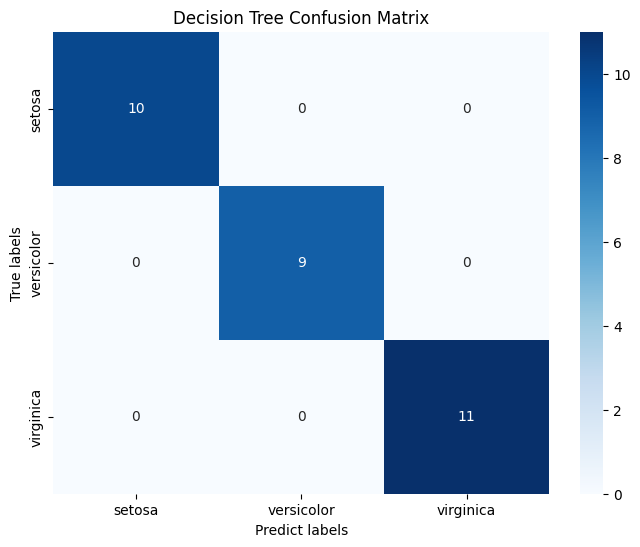

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
# Dự đoán trên tập test
y_pred = knn_model.predict(X_test)

# Đánh giá độ chính xác bằng accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác mô hình KNN:", accuracy)
import matplotlib.pyplot as plt
import seaborn as sns
report = classification_report(y_test, y_pred)
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predict labels')
plt.ylabel('True labels')
plt.title('K Nearest Neighbors Classizier Confusion Matrix')
plt.show()

**Neural	Network**




In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

neural_network_model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(3, activation='softmax')
])

neural_network_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
neural_network_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
120/120 [==============================] - 2s 4ms/step - loss: 1.0633 - accuracy: 0.4833
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 0.9776 - accuracy: 0.6833
Epoch 3/100
120/120 [==============================] - 1s 8ms/step - loss: 0.8571 - accuracy: 0.8417
Epoch 4/100
120/120 [==============================] - 1s 7ms/step - loss: 0.7215 - accuracy: 0.7500
Epoch 5/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.9000
Epoch 6/100
120/120 [==============================] - 1s 5ms/step - loss: 0.5053 - accuracy: 0.9250
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 0.4440 - accuracy: 0.9333
Epoch 8/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3938 - accuracy: 0.9500
Epoch 9/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3504 - accuracy: 0.9583
Epoch 10/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3135 - accura

1/1 [==============================] - 0s 24ms/step
Độ chính xác mô hình Naive Bayes: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



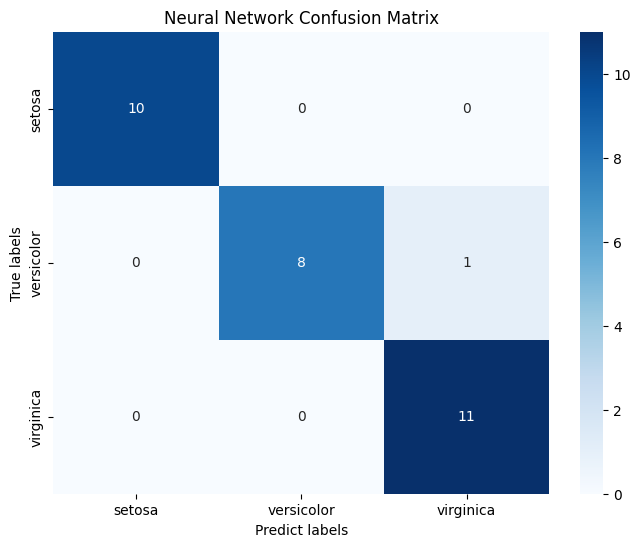

In [42]:
y_pred_prob = neural_network_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác mô hình Naive Bayes:", accuracy)
import matplotlib.pyplot as plt
import seaborn as sns
report = classification_report(y_test, y_pred)
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predict labels')
plt.ylabel('True labels')
plt.title('Neural Network Confusion Matrix')
plt.show()


In [43]:
import numpy as np

In [45]:
new_data = np.array([[5.1, 3.5, 1.4, 0.2],
                     [6.2, 2.9, 4.3, 1.3],
                     [7.3, 2.8, 6.4, 2.1],
                     [2.1, 8.8, 8.5, 9.2]])

new_data = new_data / new_data.max(axis=0)

pred_prob_DT = decision_tree_model.predict(new_data)

pred_prob_naive = gnb_model.predict(new_data)

pred_prob_knn = knn_model.predict(new_data)

pred_prob_nn = neural_network_model.predict(new_data)
pred_nn = np.argmax(pred_prob_nn, axis=1)

print("Decision Tree Predicted labels: ", pred_prob_DT)
print("Naive Bayes Predicted labels: ", pred_prob_naive)
print("KNN Predicted labels: ", pred_prob_knn)
print("Neutral Network Predicted labels: ", pred_nn )

1/1 [==============================] - 0s 41ms/step
Decision Tree Predicted labels:  [0 0 0 0]
Naive Bayes Predicted labels:  [0 1 1 2]
KNN Predicted labels:  [0 1 1 2]
Neutral Network Predicted labels:  [0 1 1 2]


Nhận xét

Decision Tree: Dự đoán tất cả các mẫu thuộc lớp 0.

  Naive Bayes, KNN, Neural Network: Dự đoán tất cả các mẫu đều thuộc các lớp khác nhau (0, 1, 2).
Phân tích:


*   Decision Tree: Có vẻ như mô hình Decision Tree đã overfitting (học thuộc lòng) dữ liệu train và không thể tổng quát hóa tốt cho dữ liệu mới. Nó luôn dự đoán tất cả các mẫu thuộc cùng một lớp.
*   Naive Bayes, KNN, Neural Network: Các mô hình này có vẻ như đang dự đoán chính xác hơn bằng cách phân loại các mẫu vào các lớp khác nhau.

